In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/Users/manishghoshal/Downloads/DS - Python + SQL + ETL - Healthcare Census (4)/DS - Python + SQL + ETL - Healthcare Census/Data/census_2011.csv'
census_data = pd.read_csv(file_path)

In [9]:
missing_percentage_before = (census_data.isnull().sum() / len(census_data)) * 100
missing_percentage_before

District code                    0.00000
State name                       0.00000
District name                    0.00000
Population                       4.68750
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Power_Parity               5.00000
Length: 118, dtype: float64

In [10]:
census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
census_data['Literate'].fillna(census_data['Male_Literate'] + census_data['Female_Literate'], inplace=True)
census_data['Households'].fillna(census_data['Rural_Households'] + census_data['Urban_Households'], inplace=True)
census_data['Age_Group_0_29'].fillna(census_data['Population'] - census_data['Age_Group_30_49'] - census_data['Age_Group_50'] - census_data['Age not stated'], inplace=True)

In [11]:
missing_percentage_after = (census_data.isnull().sum() / len(census_data)) * 100
missing_percentage_after

District code                    0.00000
State name                       0.00000
District name                    0.00000
Population                       0.15625
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Power_Parity               5.00000
Length: 118, dtype: float64

In [15]:
visualization_data = pd.DataFrame({
    'Column': missing_percentage_before.index,
    'Missing Percentage Before Filling': missing_percentage_before.values,
    'Missing Percentage After Filling': missing_percentage_after.values
    })

heatmap_data = visualization_data.melt(id_vars='Column', var_name='Filling Status', value_name='Missing Percentage')

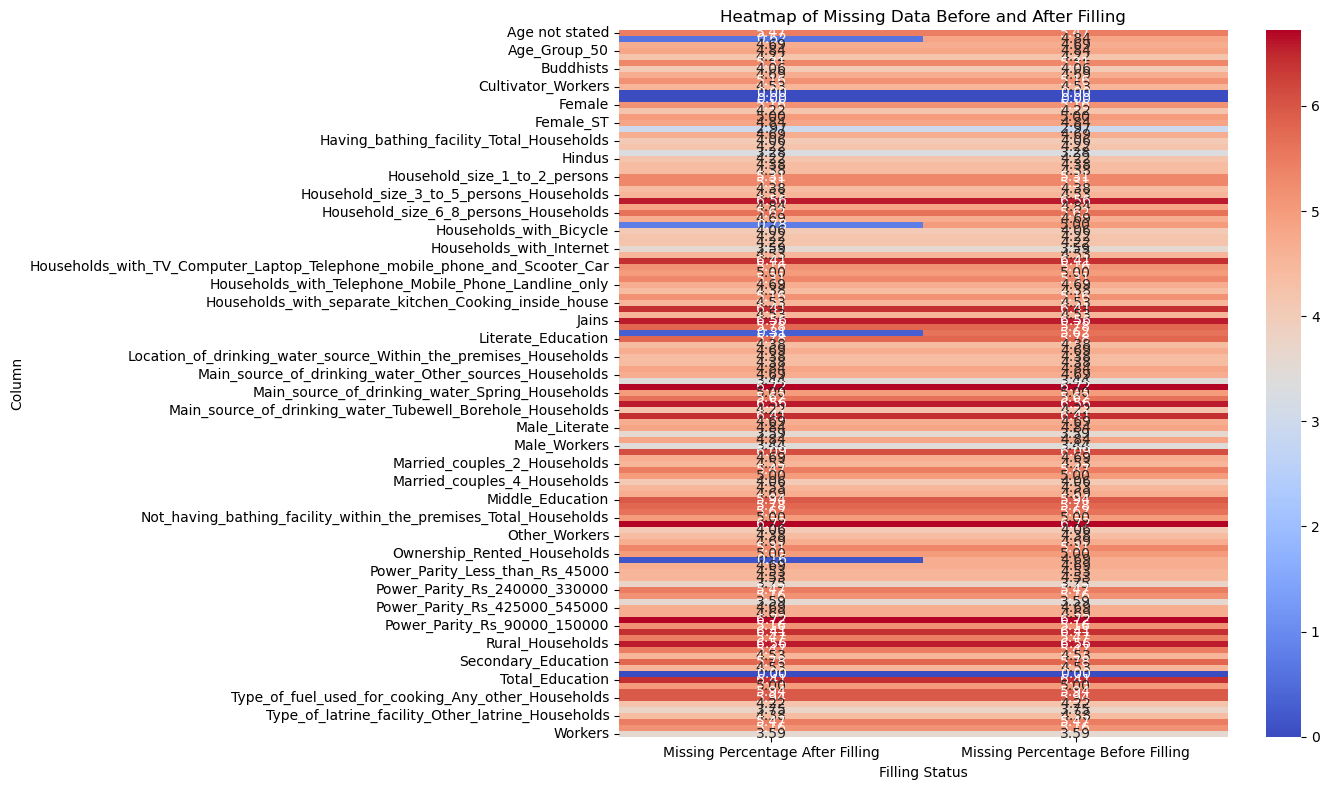

In [16]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=heatmap_data.pivot(index='Column', columns='Filling Status', values='Missing Percentage'), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Missing Data Before and After Filling')
plt.tight_layout()
plt.show()